# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
# Your work here.

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

def ecdf(data):
    #Compute ECDF for a one-dimensional array of measurements.
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

df = pd.read_csv('data/human_body_temperature.csv')



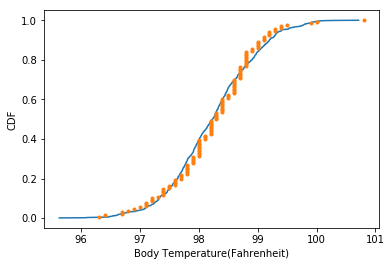

In [6]:
# Calculate the theoritical CDF and ECDF of the temperature data 
# Plot ECDF over the theoritical CDF 
x_data, y_data = ecdf(df.temperature)
samples = np.random.normal(temp_mean,temp_std,size=1000)
#print(samples)
x_theo, y_theo = ecdf(samples)
plt.plot(x_theo, y_theo)
plt.plot(x_data, y_data, marker='.', linestyle='none')
plt.xlabel('Body Temperature(Fahrenheit)')
plt.ylabel('CDF')
plt.show()

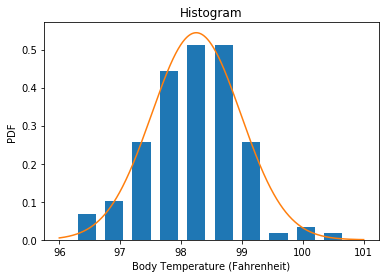

In [5]:
# Draw a histogram of body temperature and a normal distribution

plt.hist(df.temperature, width=0.3, density=True)
#plt.hist(df.temperature, width=0.3, normed=True)
#normed parameter deprecated and replaced by density parameter
plt.xlabel('Body Temperature (Fahrenheit)')
plt.ylabel('PDF')
plt.title('Histogram')
samples1 = np.linspace(96, 101, 1000)
temp_mean = df.temperature.mean()
temp_std = df.temperature.std()
pdf = stats.norm.pdf(samples1, temp_mean, temp_std)
plt.plot(samples1, pdf)

### 1. Is the distribution of body temperatures normal?
   The histogram of the data with the probability density function shows the data is mostly normal
   Another method to check the normality is overlaying CDF of the normal curve with Empirical CDF of the temperature data. We can see that the datapoints are on the curve and does not diverge much from the normal curve. 
   Above methods show that the data is normal.

### 2. Is the sample size large? Are the observations independent? 
   Sample size is 130 which is more than 30, so the sample size is large.
   There are equal number of males and females in the sample.  
   There is no information available on how the data was collected. Assuming the data collection was supposed to have equal number of males and females, the observations are independent.


### 3. Is the true population mean really 98.6 degrees F?

####   Bootstrap hypothesis test

Null Hypothesis:  The true population mean is 98.6


In [7]:

# Shift the given data set to match the population mean of 98.6
shifted_temperature_data = df.temperature - np.mean(df.temperature) + 98.6

# Create the bootstrap replicates of the shifted data
size = 100000
bs_replicates = np.empty(size)
for i in range(size):
    bs = np.random.choice(shifted_temperature_data,len(shifted_temperature_data))
    bs_replicates[i] = np.mean(bs)

#Compute fraction of replicates that are less than the observed temperature mean: p
p_value = np.sum(bs_replicates <= np.mean(df.temperature)) / 100000
print('p_value :- ', p_value)

p_value :-  0.0


The p_value of 0 implies that even one replicate wasn't as extreme as given population mean.
It suggests that the null hypothesis,the population mean is equal to 98.6 is not true


####  Frequentist statistical testing

 We should use one-sample test  since we are comparing one set of data to a value, population mean.
 
 Null Hypothesis      : The population mean = 98.6
 Alternate Hypothesis : The population mean != 98.6
 
 Setting significance level = 0.05
 
 We should use two-tailed test as we are not testing in one direction
 
 We calculate z-statistic for the test as the sample is normally distributed and sample size is more than 30

In [8]:
# Calculate z-statistic

from statsmodels.stats.weightstats import ztest

z_stat, p_value_z = ztest(x1= df.temperature, value = 98.6)
print('z-statistic :- ', z_stat)
print('p_value :- ', p_value_z)

z-statistic :-  -5.4548232923645195
p_value :-  4.9021570141012155e-08


p_value, 0.000000049 is less than the significance level which says that the null hypothesis is rejected.

The population mean = 98.6 cannot be accepted.





In [9]:
# Calculate t-statistic

from scipy.stats import ttest_1samp

t_stat, p_value_t = ttest_1samp(df.temperature, 98.6)
print('t-statistic :- ', t_stat)
print('p_value :- ', p_value_t)

t-statistic :-  -5.4548232923645195
p_value :-  2.4106320415561276e-07


t-statistic is similar to z-statistics because t distribution approaches z distribution as the sample size increases.


#### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests

In [71]:
# draw a small sample of size 10 without replacement
np.random.seed(100)
sample_10 = np.random.choice(df.temperature, size=10, replace=False)
print(sample_10)

z_stat1, p_value_z1 = ztest(x1= sample_10, value = 98.6)
print('z-statistic for sample size 10:- ', z_stat1)
print('p_value :- ', p_value_z1,'\n')

t_stat1, p_value_t1 = ttest_1samp(sample_10, 98.6)
print('t-statistic for sample size 10 :- ', t_stat1)
print('p_value :- ', p_value_t1)


[96.7 97.  96.7 98.8 98.8 98.2 98.  97.5 98.  98.3]
z-statistic for sample size 10:-  -3.1957418477478403
p_value :-  0.0013947183948314953 

t-statistic for sample size 10 :-  -3.1957418477478403
p_value :-  0.010905578505191494


Since the sample size is below 30, we must use the t distribution table to calculate the p-value for the sample mean.
The p-value of getting mean value as low or lower than the observed mean is 1.09*2= 2.18%

#### 5. At what temperature should we consider someone's temperature to be "abnormal"?

'Abnormal' temperature is the temperature which lies outside the confidence interval, assuming confidence level of 95%

####  Bootstrap method

We obtain the confidence interval at given confidence level of 95% by passing the 2.5% and 97.5% percentile of the means of the replicates.

In [77]:
size = 100000
bs_replicates = np.empty(size)
for i in range(size):
    bs = np.random.choice(df.temperature,len(df.temperature))
    bs_replicates[i] = np.mean(bs)
    
CI = np.percentile(bs_replicates,[2.5,97.5])
print("The confidence interval is equal to ", CI)

The confidence interval is equal to  [98.12384615 98.37461538]


At the confidence level of 95%, we can say that the temperature which lies outside of 98.12 and 98.37 is considered abnormal


####  Frequentist approach
Caluculate the Standard error of the sampling distribution of the sample means
Calculate the sample mean
At confidence interval of 95%, Critical value(Z) = +/-1.96
Confidence interval = sample mean +/- Margin of error
Margin of error = critical_value*std error


In [80]:
# calculate 95% confidence interval
sem = np.std(df.temperature)/np.sqrt(len(df.temperature)) # sem is std error of the sampling distribution of sample mean
sample_mean = np.mean(df.temperature)

# 95% of values fall within 1.96 of the mean in a normal distribution
critical_value = 1.96
margin_of_error = critical_value * sem
lower_limit = sample_mean - margin_of_error
upper_limit = sample_mean + margin_of_error

print('\n')
print("95% confidence interval:  (", lower_limit, ", ", upper_limit, ')')
print("Margin of error:", margin_of_error)





95% confidence interval:  ( 98.12367980442819 ,  98.37478173403336 )
Margin of error: 0.125550964802579


By frequentish approach, at confidence level 95%, we can say any temperature < 98.12 and > 98.37 is abnormal

### 6.  Is there a significant difference between males and females in normal temperature?

In [11]:
df_male = df[df.gender == 'M']
df_female = df[df.gender == 'F']

In [12]:
# Calculate the normal temperature for males
sem_male = np.std(df_male.temperature)/np.sqrt(len(df_male.temperature)) # sem is std error of the sampling distribution of sample mean
sample_mean_male = np.mean(df_male.temperature)

# Critical value is 1.96 at confidence interval 95%
critical_value = 1.96
margin_of_error_male = critical_value * sem_male
lower_limit_male = sample_mean_male - margin_of_error_male
upper_limit_male = sample_mean_male + margin_of_error_male

print('\n')
print("At 95% confidence level, we can say normal temperature for the males lie between the confidence interval:  \n(", lower_limit_male, ", ", upper_limit_male, ')')




At 95% confidence level, we can say normal temperature for the males lie between the confidence interval:  
( 97.93605399456493 ,  98.27317677466587 )


In [13]:
# Calculate the normal temperature for females
sem_female = np.std(df_female.temperature)/np.sqrt(len(df_female.temperature)) # sem is std error of the sampling distribution of sample mean
sample_mean_female = np.mean(df_female.temperature)

# Critical value is 1.96 at confidence interval 95%
critical_value = 1.96
margin_of_error_female = critical_value * sem_female
lower_limit_female = sample_mean_female - margin_of_error_female
upper_limit_female = sample_mean_female + margin_of_error_female

print('\n')
print("At 95% confidence level, we can say normal temperature for the females lie between the confidence interval:  \n(", lower_limit_female, ", ", upper_limit_female, ')')




At 95% confidence level, we can say normal temperature for the females lie between the confidence interval:  
( 98.21449403134109 ,  98.57319827635116 )


 We can perform Hypothesis test on two populations to test the difference between population means.
This is a two tail tesr since we are testing whether there is difference between male sample mean and female sample mean.

Null Hypothesis:      sample_mean_male = sample_mean_female

Alternate Hypothesis: sample_mean_male != sample_mean_female    

Level of significance = 0.05


In [21]:
# Calculate t-statistic 

diff_in_mean = sample_mean_male - sample_mean_female
female_var = np.var(df_female.temperature)
male_var = np.var(df_male.temperature)

std = np.sqrt(female_var/len(df_female) + male_var/len(df_male))

t_stat = (diff_in_mean - 0)/std
p_value = stats.t.sf(np.abs(t_stat), len(df_male)+len(df_female)-2)*2
print("The p value: %7.4f" % p_value )

The t-statistic:  0.0229


The p value, 0.0229 is less than significance level of 0.05, so the null hypothesis cannot be accepted. There is difference in mean temperature between males and females which can mean that either females or males have higher mean temperature. Females are known to have higher body temperature than males.